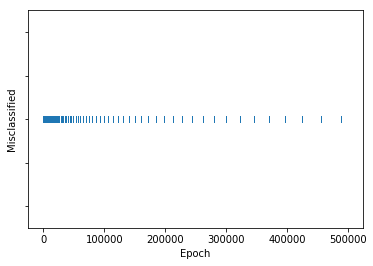

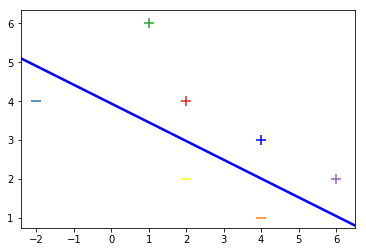

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])


y = np.array([-1, -1, 1, 1, 1])

# for d, sample in enumerate(X):
#     if d < 2:
#         plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
#     else:
#         plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
# 
# plt.plot([-2, 6], [6, 0.5])
# # lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    leng_x = len(X[0])
    w = np.zeros(leng_x )
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1, epochs):
        error = 0

        for i, x in enumerate(X):
            # misapplication
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ((X[i] * Y[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + eta * (-2 * (1/epoch) * w)
            errors.append(error)

        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w


w = svm_sgd_plot(X,y)

for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')